<a href="https://colab.research.google.com/github/pp2444/ASA_Spring2021/blob/main/ASA_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

## 1)
$\lim_{c \to 0} -c \log(p(c)) = 0.5$

## 2) MC estimation 

In [ ]:
# Generate M X(1), and compute the probability p(c)=P[X(1)>1]
def mc_pc(M,c):
    X = np.random.normal(size=M)
    return ((np.sqrt(c)[:,None]@ X[None,:])>1).sum(axis=1)/M

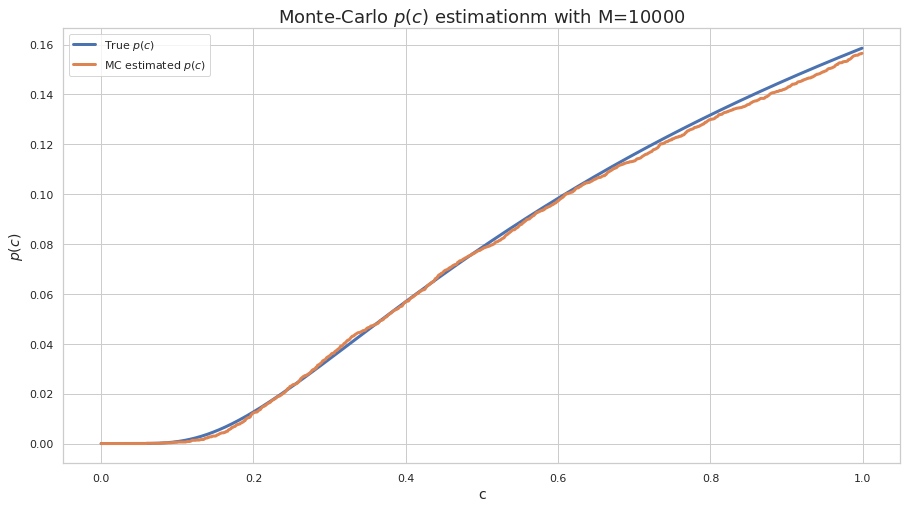

In [ ]:
c = np.arange(1e-7,1,0.001)
# True p(c) = 1/2 - 1-2*erf(1/sqrt(2c))
true_pc = 0.5 - 0.5*erf(1/np.sqrt(2*c))

M = 10000
# get MC estimation of p(c)
pc_m = mc_pc(M,c)

plt.figure(figsize=(15,8))
plt.title(f'Monte-Carlo $p(c)$ estimationm with M={M}', fontsize=18)
plt.xlabel('c',fontsize=14)
plt.ylabel('$p(c)$', fontsize=14)
sns.lineplot(x=c,y=true_pc, label='True $p(c)$', linewidth=3);
sns.lineplot(x=c,y=pc_m, label='MC estimated $p(c)$',linewidth=3);

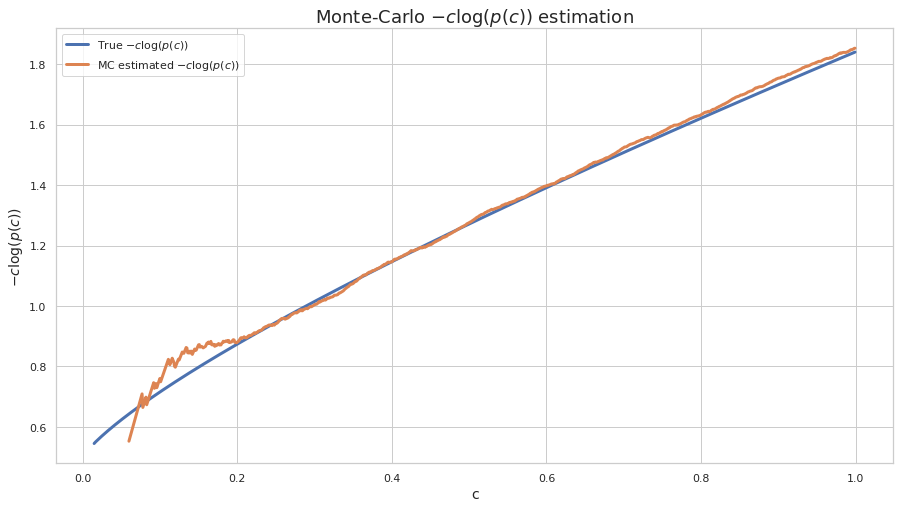

In [ ]:
# compute the term -c log(p(c)) for true p(c) and MC estimation p(c)
true_lim = -c*np.log(true_pc)
mc_lim = -c*np.log(pc_m)
plt.figure(figsize=(15,8))
plt.title('Monte-Carlo $-c\\log(p(c))$ estimation', fontsize=18)
plt.xlabel('c',fontsize=14)
plt.ylabel('$-c\\log(p(c))$', fontsize=14)
# plot only for the c values closer to 0
sns.lineplot(x=c,y=true_lim, label='True $-c\\log(p(c))$', linewidth=3);
sns.lineplot(x=c,y=mc_lim, label='MC estimated $-c\\log(p(c))$',linewidth=3);

In [ ]:
# Relative error is given by error = sqrt(1-p(c))/sqrt(M*p(c))
def get_rel_error(pc,M):
    return np.sqrt((1-pc)/M*pc)

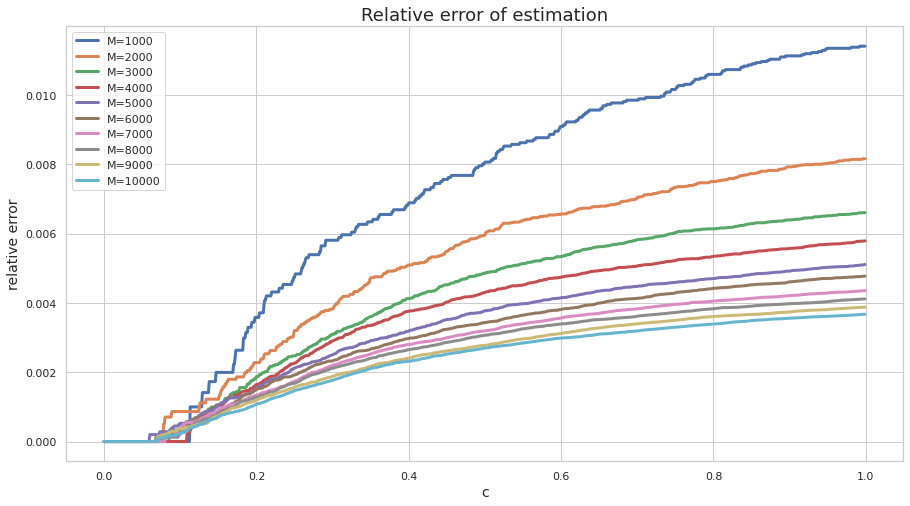

In [ ]:
Ms = np.arange(1000,10001,1000)

plt.figure(figsize=(15,8))
plt.title('Relative error of estimation',fontsize=18)
plt.xlabel('c',fontsize=14)
plt.ylabel('relative error', fontsize=14)

# Plot relative error for different M values
for M in Ms:
    pc =  mc_pc(M,c)
    rel_err = get_rel_error(pc,M)
    sns.lineplot(x=c,y=rel_err, linewidth=3,label=f'M={M}');

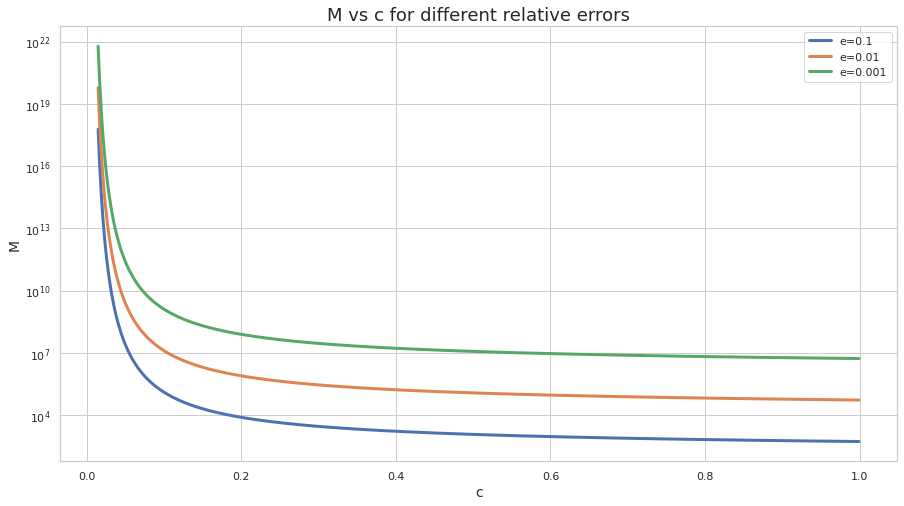

In [ ]:
plt.figure(figsize=(15,8))
plt.title('M vs c for different relative errors',fontsize=18)
plt.xlabel('c',fontsize=14)
plt.ylabel('M', fontsize=14)

# Plot the required M for a given stable relative error by M = (1/pc)/(error^2 * p(c))
for e in[0.1,0.01,0.001]:
    M = (1-true_pc)/(e**2 * true_pc)
    sns.lineplot(x=c,y=M, linewidth=3, label=f'e={e}');
plt.yscale('log', basey=10);

In [ ]:
# Generate M X(1), and compute the probability p(c)=P[X(1)>1]
def mc_imp_pc(M,c):
    X = np.random.normal(size=M)
    p = erf(X)
    X = X/p
    return ((np.sqrt(c)[:,None]@ X[None,:])>1).sum(axis=1)/M

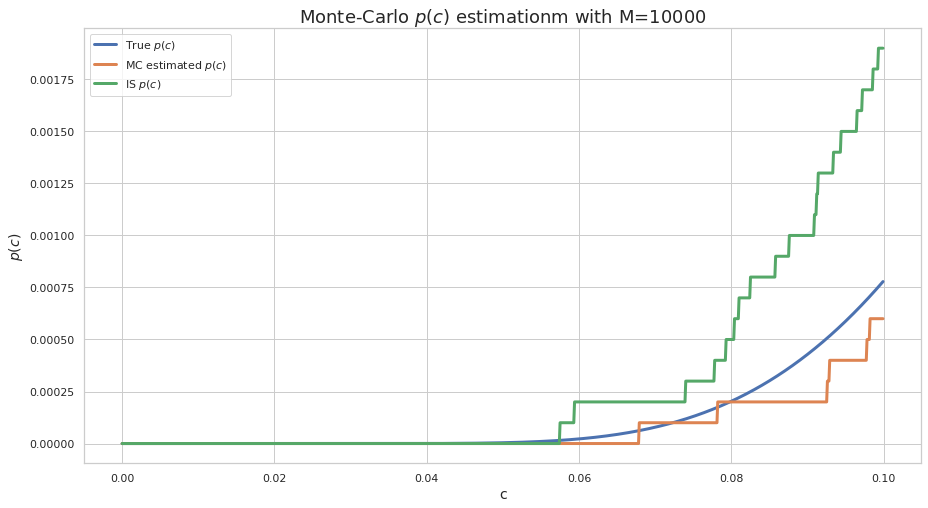

In [ ]:
c = np.arange(1e-7,0.1,0.0001)
# True p(c) = 1/2 - 1-2*erf(1/sqrt(2c))
true_pc = 0.5 - 0.5*erf(1/np.sqrt(2*c))

M = 10000
# get MC estimation of p(c)
pc_imp = mc_imp_pc(M,c)
pc_m = mc_pc(M,c)

plt.figure(figsize=(15,8))
plt.title(f'Monte-Carlo $p(c)$ estimationm with M={M}', fontsize=18)
plt.xlabel('c',fontsize=14)
plt.ylabel('$p(c)$', fontsize=14)
sns.lineplot(x=c,y=true_pc, label='True $p(c)$', linewidth=3);
sns.lineplot(x=c,y=pc_m, label='MC estimated $p(c)$',linewidth=3);
sns.lineplot(x=c,y=pc_imp, label='IS $p(c)$',linewidth=3);